# Internsavy

# Task 1:Use classification technique for prediction of Graduate Admissions from an Indian perspective

# Author: AISWARYA S

In [58]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [59]:
#loading dataset
df=pd.read_csv("C:/Users/Aiswarya/Downloads/archive (25)/admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [60]:
#checking data types
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [61]:
df.SOP

0      4.5
1      4.0
2      3.0
3      3.5
4      2.0
      ... 
495    4.5
496    5.0
497    4.5
498    4.0
499    4.5
Name: SOP, Length: 500, dtype: float64

In [62]:
#checking missing and null values 
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [63]:
#chcek for any duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [64]:
#displaying the information about row and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [65]:
#displaying the statistical information 
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [66]:
df.corr('pearson')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [67]:
col1=df['GRE Score']
col2=df['TOEFL Score']
correlation=col1.corr(col2)
correlation

0.8272004035317218

In [68]:
col1=df['GRE Score']
col2=df['University Rating']
correlation=col1.corr(col2)
correlation

0.6353762113239015

In [69]:
col1=df['CGPA']
col2=df['TOEFL Score']
correlation=col1.corr(col2)
correlation

0.8105735363036228

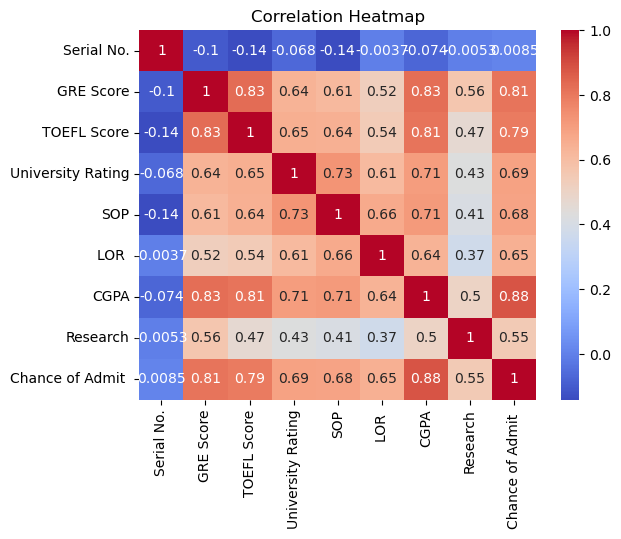

In [70]:
#correlation 
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

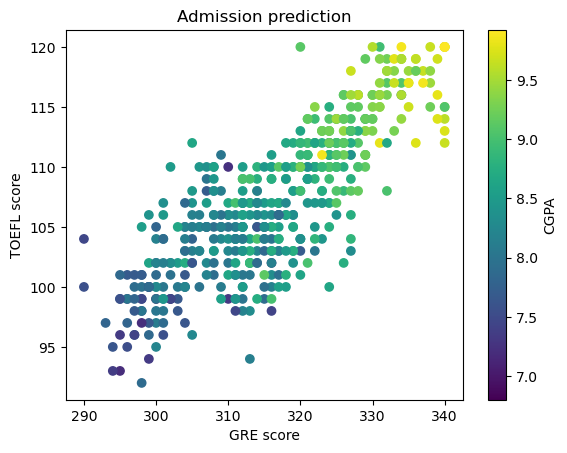

In [71]:
#visualizing the admission prediction 
gre_score=df['GRE Score']
toefl_score=df['TOEFL Score']
cgpa=df['CGPA']
plt.scatter(gre_score,toefl_score,c=cgpa,cmap='viridis')
plt.xlabel('GRE score')
plt.ylabel('TOEFL score')
plt.colorbar(label='CGPA')
plt.title('Admission prediction')
plt.show()

In [73]:
print(df.columns)
df.columns = df.columns.str.strip()


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


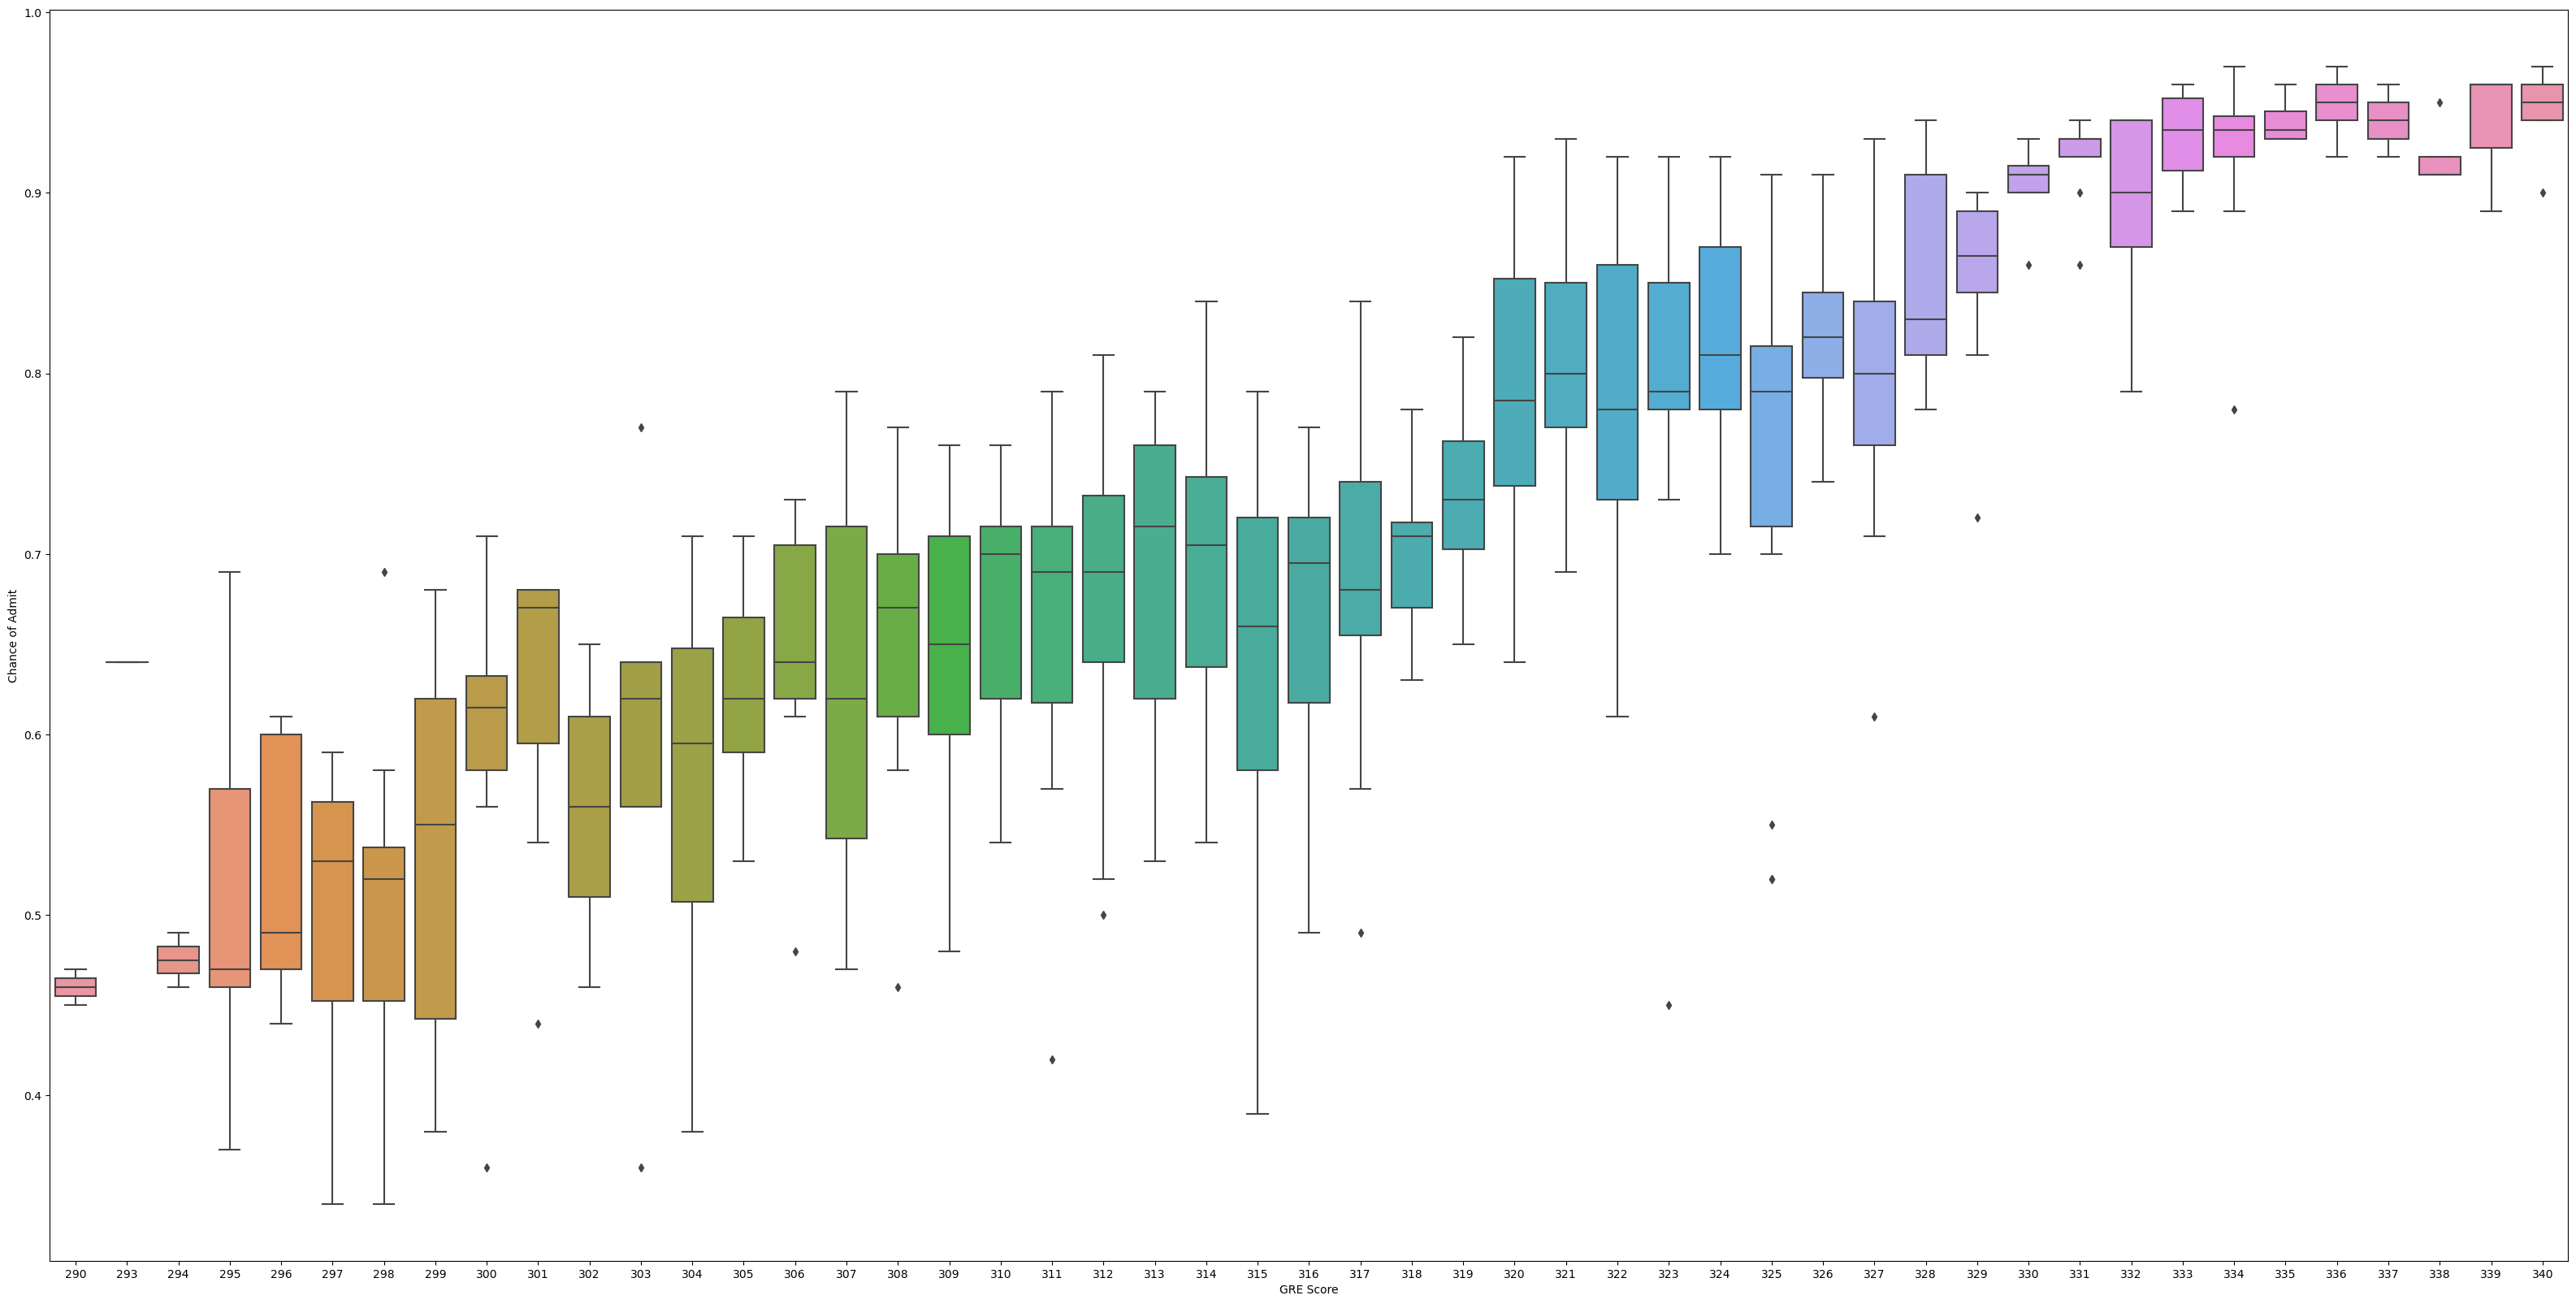

In [74]:
plt.figure(figsize=(40,20))
sns.boxplot(df['GRE Score'],df['Chance of Admit'])
plt.show()

In [75]:
#selecting feature variable and target variable 
X=df[['GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR','Research']]
y=df['Chance of Admit']


In [76]:
X.shape,y.shape

((500, 7), (500,))

In [77]:
#selecing model and importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
print(X_train)

     GRE Score  TOEFL Score  CGPA  University Rating  SOP  LOR  Research
249        321          111  8.83                  3  3.5  4.0         1
433        316          111  8.54                  4  4.0  5.0         0
19         303          102  8.50                  3  3.5  3.0         0
322        314          107  8.27                  2  2.5  4.0         0
332        308          106  8.21                  3  3.5  2.5         1
..         ...          ...   ...                ...  ...  ...       ...
106        329          111  9.18                  4  4.5  4.5         1
270        306          105  8.22                  2  2.5  3.0         1
348        302           99  7.25                  1  2.0  2.0         0
435        309          105  7.68                  2  2.5  4.0         0
102        314          106  8.25                  2  4.0  3.5         0

[400 rows x 7 columns]


In [80]:
print(X_test)

     GRE Score  TOEFL Score  CGPA  University Rating  SOP  LOR  Research
361        334          116  9.54                  4  4.0  3.5         1
73         314          108  9.04                  4  4.5  4.0         1
374        315          105  7.65                  2  2.0  2.5         0
155        312          109  8.69                  3  3.0  3.0         0
104        326          112  9.05                  3  3.5  3.0         1
..         ...          ...   ...                ...  ...  ...       ...
347        299           94  7.34                  1  1.0  1.0         0
86         315          106  8.42                  3  4.5  3.5         0
75         329          114  8.56                  2  2.0  4.0         1
438        318          110  8.54                  1  2.5  3.5         1
15         314          105  8.30                  3  3.5  2.5         0

[100 rows x 7 columns]


In [81]:
X_train.shape,X_test.shape

((400, 7), (100, 7))

In [82]:
y_train.shape,y_test.shape

((400,), (100,))

In [83]:
model=LinearRegression()
model

LinearRegression()

In [84]:
model.fit(X_train,y_train)

LinearRegression()

In [85]:
y_predict=model.predict(X_test)
y_predict

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [86]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.0037046553987884114
R-squared Score: 0.8188432567829628


R-squared ranges from 0 to 1, where a value of 1 indicates a perfect fit, and a value of 0 indicates that the model does not explain any of the variance. In your case, the R-squared score of 81.88% suggests that the model explains about 81.88% of the variance in the target variable, indicating a reasonably good fit.

In [87]:
#checking with new data
new_data = pd.DataFrame({
    'GRE Score': [350],
    'TOEFL Score': [120],
    'CGPA': [9.0],
    'University Rating': [4],
    'SOP': [4.9],
    'LOR': [4.5],
    'Research': [1]
})

In [88]:
# Make predictions on new data
predictions = model.predict(new_data)

# Display the predictions
print('The chance of admit is',predictions)

The chance of admit is [0.92361492]


In [89]:
# Creating a DataFrame to compare the predicted and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

# Displaying the first 10 rows of the DataFrame
print(comparison_df.head(20))

     Actual  Predicted
361    0.93   0.914575
73     0.84   0.795181
374    0.39   0.572660
155    0.77   0.707370
104    0.74   0.815883
394    0.89   0.862066
377    0.47   0.474597
124    0.57   0.648509
68     0.68   0.823787
450    0.82   0.807415
9      0.45   0.721932
194    0.77   0.725891
406    0.61   0.656322
84     0.94   0.936772
371    0.89   0.824152
388    0.49   0.509792
495    0.87   0.839319
30     0.65   0.597273
316    0.54   0.533396
408    0.57   0.571560


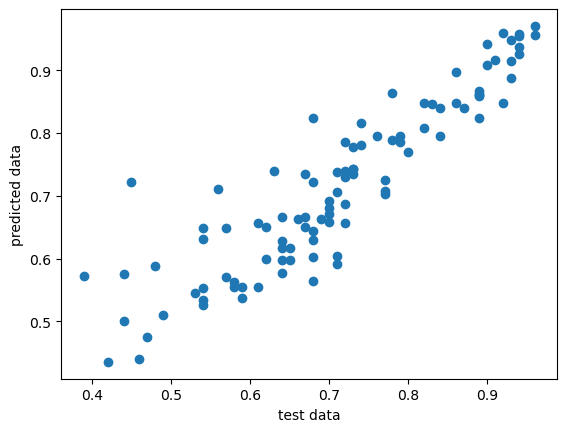

In [53]:
plt.scatter(y_test,y_predict)
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.show()